# Notebook of Week 6 REDO

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Callable
from scipy.integrate import solve_ivp

In [14]:
# Quantum Circuits!
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister

# General Imports
from qiskit.primitives import StatevectorSampler
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Noisy simulations
from qiskit_aer import AerSimulator
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

# Running on a real quantum computer
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2

In [19]:
# Create a Quantum Circuit acting on a quantum register of 2 qubits and 2 bits
qc = QuantumCircuit(2,6)

# Prepare the initial state as a superposition of |00> and |11>
overlap_coef = 0.5  # adjust this parameter to control the overlap coefficients
qc.h(0)
qc.cx(0, 1)
qc.ry(2 * overlap_coef * np.arcsin(np.sqrt(1 - overlap_coef**2)), 1)

# Estimate state vector at the end
state = Statevector(qc)
state.draw("latex")

<IPython.core.display.Latex object>

In [16]:
# Measure both qubits in the computational basis
qc.measure([0,1],[0,1])
qc.measure([0,1],[2,3])
qc.measure([0,1],[4,5])
qc.draw()

┌───┐                ┌─┐   ┌─┐   ┌─┐   
q_0: ┤ H ├──■─────────────┤M├───┤M├───┤M├───
     └───┘┌─┴─┐┌─────────┐└╥┘┌─┐└╥┘┌─┐└╥┘┌─┐
q_1: ─────┤ X ├┤ Ry(π/3) ├─╫─┤M├─╫─┤M├─╫─┤M├
          └───┘└─────────┘ ║ └╥┘ ║ └╥┘ ║ └╥┘
c: 6/══════════════════════╩══╩══╩══╩══╩══╩═
                           0  1  2  3  4  5

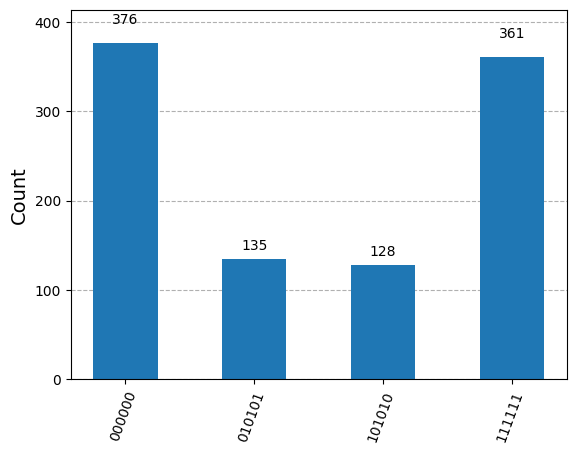

In [17]:
# Making a simulation, using a sampler
sampler = StatevectorSampler()

# Running the job
job = sampler.run([qc], shots=1000)

# The "0" index is because we can run more than one circuit
results = job.result()[0] 

# The "c" attribute is named after the classical register
counts = results.data.c.get_counts()

# Plot the results
plot_histogram(counts)